Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1933
           1       0.83      0.81      0.82      1932

    accuracy                           0.82      3865
   macro avg       0.82      0.82      0.82      3865
weighted avg       0.82      0.82      0.82      3865



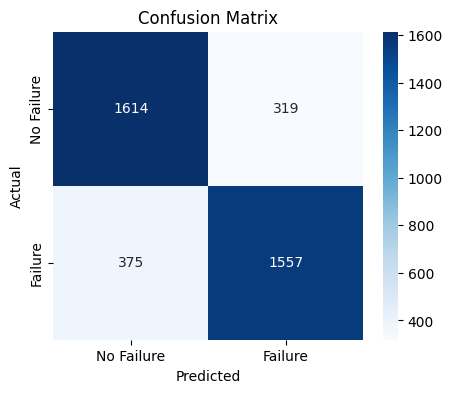

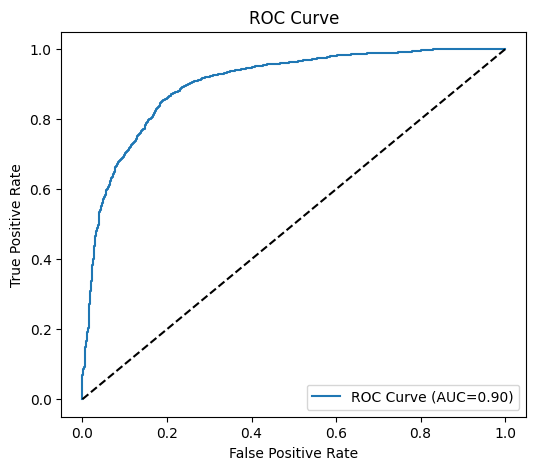

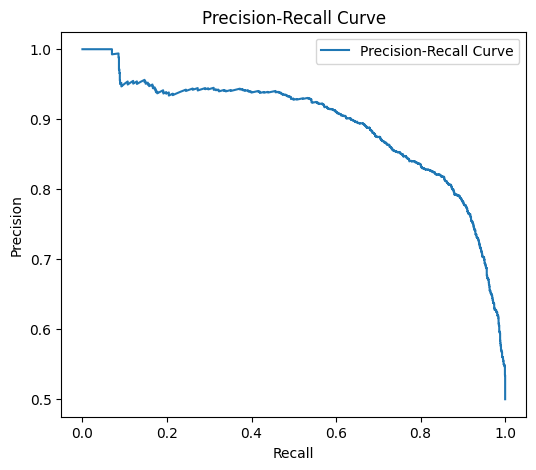

Example prediction probability of failure: 0.9919


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv('ai4i2020.csv')

# 2. Preprocessing
X = df.drop(columns=['UDI', 'Product ID', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
y = df['Machine failure']
X = pd.get_dummies(X, columns=['Type'], drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. SMOTE oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 5. Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 6. Predictions
y_pred_prob = nb_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

# 7. Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC={roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(6,5))
plt.plot(rec, prec, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Example prediction
example = X_test[0].reshape(1, -1)
pred_example = nb_model.predict_proba(example)[0][1]
print(f"Example prediction probability of failure: {pred_example:.4f}")

Best threshold: 0.40000000000000013, Best F1-score: 0.838
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.76      0.82      1933
           1       0.79      0.89      0.84      1932

    accuracy                           0.83      3865
   macro avg       0.83      0.83      0.83      3865
weighted avg       0.83      0.83      0.83      3865



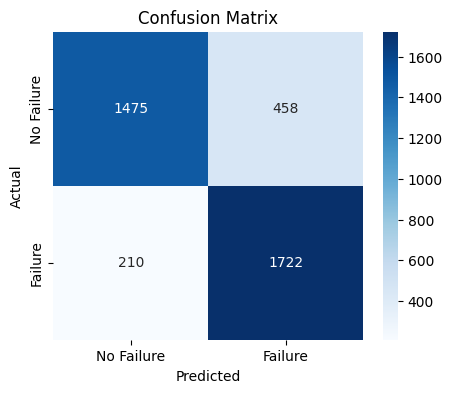

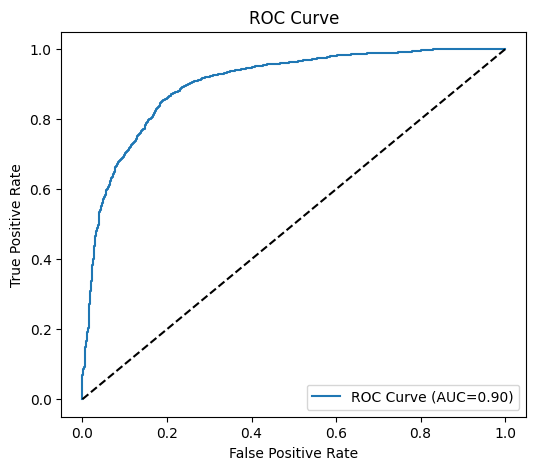

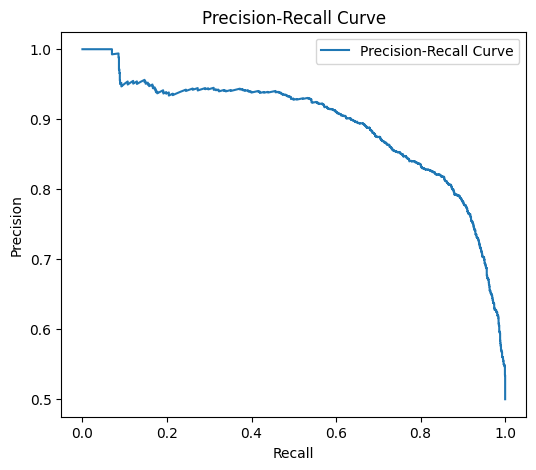

Example prediction probability of failure: 0.9919


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv('ai4i2020.csv')

# 2. Preprocessing
X = df.drop(columns=['UDI', 'Product ID', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
y = df['Machine failure']
X = pd.get_dummies(X, columns=['Type'], drop_first=True)

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. SMOTE oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 5. Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 6. Predictions and threshold tuning
y_pred_prob = nb_model.predict_proba(X_test)[:, 1]
thresholds = np.arange(0.1, 0.9, 0.05)
best_f1 = 0
best_thresh = 0.5
for t in thresholds:
    y_pred_temp = (y_pred_prob > t).astype(int)
    f1 = classification_report(y_test, y_pred_temp, output_dict=True)['1']['f1-score']
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

# Apply best threshold
y_pred = (y_pred_prob > best_thresh).astype(int)

# 7. Evaluation
print(f"Best threshold: {best_thresh}, Best F1-score: {best_f1:.3f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC={roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(6,5))
plt.plot(rec, prec, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Example prediction
example = X_test[0].reshape(1, -1)
pred_example = nb_model.predict_proba(example)[0][1]
print(f"Example prediction probability of failure: {pred_example:.4f}")